In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/csl-4/Documents/7348/ASSIGNMENT2/academic_performance_50.csv")
df.head()

,Student_ID,Age,Gender,Attendance_Percentage,Study_Hours_per_Week,Math_Score,Science_Score,English_Score
0,1,23,Male,96.34,13.05,57.01,50.95,53.25
1,2,21,male,101.48,5.76,78.11,72.71,71.55
2,3,22,FEMALE,83.74,14.29,61.48,62.12,74.03
3,4,18,FEMALE,NaN,4.58,52.65,71.55,71.32
4,5,19,male,67.71,6.23,69.91,89.93,69.96


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             50 non-null     int64  
 1   Age                    50 non-null     int64  
 2   Gender                 50 non-null     object 
 3   Attendance_Percentage  49 non-null     float64
 4   Study_Hours_per_Week   49 non-null     float64
 5   Math_Score             49 non-null     float64
 6   Science_Score          50 non-null     float64
 7   English_Score          50 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 3.2+ KB


In [4]:
df.describe()


,Student_ID,Age,Attendance_Percentage,Study_Hours_per_Week,Math_Score,Science_Score,English_Score
count,50.00000,50.00000,49.000000,49.000000,49.000000,50.000000,50.000000
mean,25.50000,20.50000,81.568367,12.976122,68.655714,68.033600,74.527600
std,14.57738,3.81859,12.934078,8.092368,16.473793,13.880215,9.819331
min,1.00000,-2.00000,51.130000,2.490000,37.120000,39.570000,52.590000
25%,13.25000,19.00000,71.610000,8.260000,59.420000,60.147500,67.720000
50%,25.50000,21.00000,79.080000,12.410000,66.150000,69.105000,74.200000
75%,37.75000,23.00000,90.580000,14.450000,76.280000,75.075000,81.012500
max,50.00000,24.00000,115.380000,55.000000,145.000000,102.620000,98.030000


In [5]:
df.isnull().sum()

Student_ID               0
Age                      0
Gender                   0
Attendance_Percentage    1
Study_Hours_per_Week     1
Math_Score               1
Science_Score            0
English_Score            0
dtype: int64

In [7]:
df["Attendance_Percentage"].fillna(df["Attendance_Percentage"].mean(), inplace=True)
df["Study_Hours_per_Week"].fillna(df["Study_Hours_per_Week"].mean(), inplace=True)
df["Math_Score"].fillna(df["Math_Score"].mean(), inplace=True)
df.isnull().sum()


/tmp/ipykernel_5835/4119788314.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Attendance_Percentage"].fillna(df["Attendance_Percentage"].mean(), inplace=True)
/tmp/ipykernel_5835/4119788314.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

Student_ID               0
Age                      0
Gender                   0
Attendance_Percentage    0
Study_Hours_per_Week     0
Math_Score               0
Science_Score            0
English_Score            0
dtype: int64

In [8]:
df["Gender"] = df["Gender"].str.lower()
df["Gender"] = df["Gender"].replace({"male": "Male", "female": "Female"})

In [9]:
df.loc[df["Age"] < 0, "Age"] = df["Age"].median()

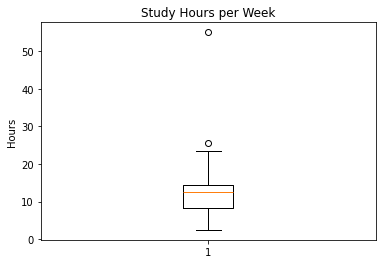

In [10]:
plt.figure()
plt.boxplot(df["Study_Hours_per_Week"])
plt.title("Study Hours per Week")
plt.ylabel("Hours")
plt.show()

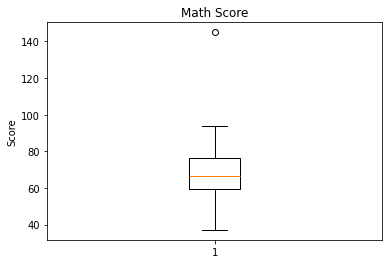

In [11]:
plt.figure()
plt.boxplot(df["Math_Score"])
plt.title("Math Score")
plt.ylabel("Score")
plt.show()

In [12]:
def treat_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column.clip(lower, upper)

In [13]:
df["Study_Hours_per_Week"] = treat_outliers(df["Study_Hours_per_Week"])
df["Math_Score"] = treat_outliers(df["Math_Score"])

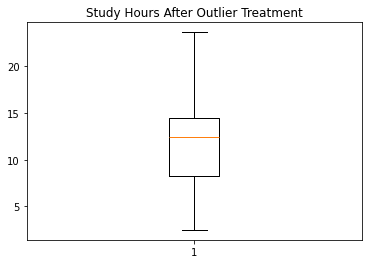

In [14]:
plt.figure()
plt.boxplot(df["Study_Hours_per_Week"])
plt.title("Study Hours After Outlier Treatment")
plt.show()

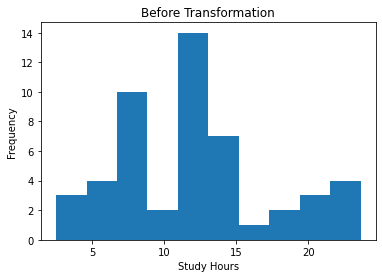

In [15]:
plt.figure()
plt.hist(df["Study_Hours_per_Week"], bins=10)
plt.title("Before Transformation")
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.show()

In [16]:
df["Log_Study_Hours"] = np.log1p(df["Study_Hours_per_Week"])

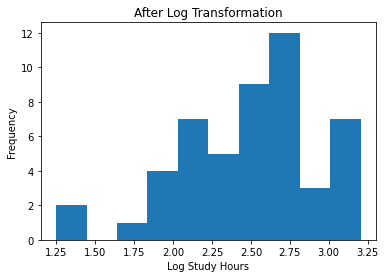

In [17]:
plt.figure()
plt.hist(df["Log_Study_Hours"], bins=10)
plt.title("After Log Transformation")
plt.xlabel("Log Study Hours")
plt.ylabel("Frequency")
plt.show()

In [18]:
df.head()

,Student_ID,Age,Gender,Attendance_Percentage,Study_Hours_per_Week,Math_Score,Science_Score,English_Score,Log_Study_Hours
0,1,23,Male,96.340000,13.05,57.01,50.95,53.25,2.642622
1,2,21,Male,101.480000,5.76,78.11,72.71,71.55,1.911023
2,3,22,Female,83.740000,14.29,61.48,62.12,74.03,2.727199
3,4,18,Female,81.568367,4.58,52.65,71.55,71.32,1.719189
4,5,19,Male,67.710000,6.23,69.91,89.93,69.96,1.978239


In [19]:
df.to_csv("academic_performance_cleaned.csv", index=False)